# Tutorial 05: Homework

### Assignement
  * For the attached data (cleaned data from the 3rd tutorial) try to use linear regression (or ridge regression, if you will) AND decision tree regressor (or boosted tree) applied on features given by PCA.
  * Try to select as less as possible features so that the results are comparably good (in terms of RMSLE) to the results obtained in the 3rd tutorial (RMSLE around 0.12).
  * Experiment with the feature selection:
    * Has removing indicator or discrete features a positive influence?
    * Are the first principal components always the best choice?

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [6]:
# loading data
data = pd.read_csv('dataHW05.csv', index_col=0)
data.head()
# spliting data to train and test datasets
dtrain, dtest = train_test_split(data, test_size=0.25, random_state=458)
X = dtrain.drop(['SalePrice'], axis = 1, errors = 'ignore')
y = dtrain.SalePrice
Xtest = dtest.drop(['SalePrice'], axis = 1, errors = 'ignore')
ytest = dtest.SalePrice

### Linear regression without PCA

In [7]:
# Linear Regression
clf1 = LinearRegression()
clf1.fit(X, y) 

# Print RMSLE
RMSLE_OLS = np.sqrt(mean_squared_error(clf1.predict(Xtest), ytest))
print('Root mean squared logarithmic error:', RMSLE_OLS)

Root mean squared logarithmic error: 0.2696064708484069


### Decision Tree without PCA

In [8]:
clf2 = DecisionTreeRegressor()
clf2.fit(X, y) 

# Print RMSLE
RMSLE_DT = np.sqrt(mean_squared_error(clf2.predict(Xtest), ytest))
print('Root mean squared logarithmic error:', RMSLE_DT)

Root mean squared logarithmic error: 0.2435000297531544


### Linear regression with PCA

c:\users\nicolas\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
c:\users\nicolas\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if sys.path[0] == '':
c:\users\nicolas\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  del sys.path[0]


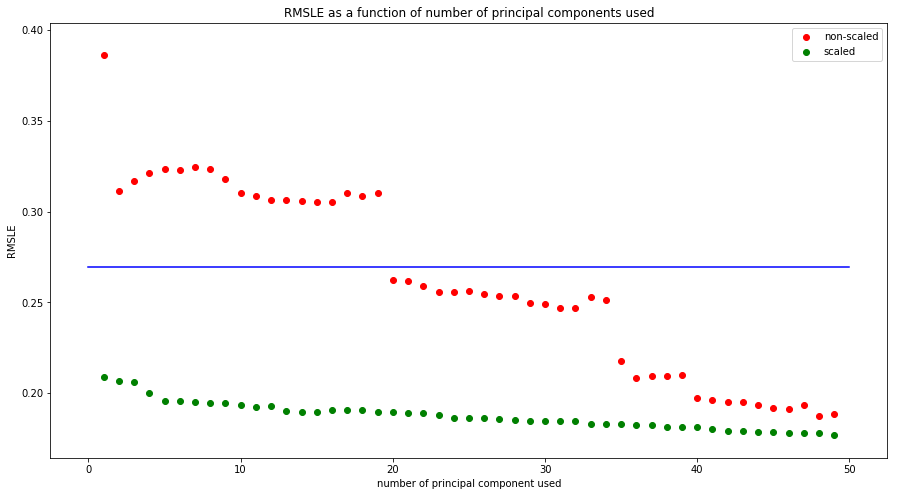

In [9]:
q = 50 # number of components

#### 
# pca with and without scaling
####
pca = PCA()
pca.fit_transform(X)
X1 = pca.transform(X)
Xtest1 = pca.transform(Xtest)

pca.fit_transform(scale(X))
X2 = pca.transform(scale(X))
Xtest2 = pca.transform(scale(Xtest))
RMSLE = []
RMSLE_scale = []
for n in range(1,q):
    Xsub1 = X1[:,0:n]
    Xsubtest1 = Xtest1[:,0:n]
    clf1 = LinearRegression()
    clf1.fit(Xsub1, y) 
    # save RMSLE
    RMSLE.append(np.sqrt(mean_squared_error(clf1.predict(Xsubtest1), ytest)))
    
    Xsub2 = X2[:,0:n]
    Xsubtest2 = Xtest2[:,0:n]
    clf1 = LinearRegression()
    clf1.fit(Xsub2, y) 
    # save RMSLE
    RMSLE_scale.append(np.sqrt(mean_squared_error(clf1.predict(Xsubtest2), ytest)))
plt.subplots(1,1, figsize=(15, 8))
ns = plt.scatter(range(1,q), RMSLE, c='red')
s = plt.scatter(range(1,q), RMSLE_scale, c='green')
plt.title(u"RMSLE as a function of number of principal components used")
plt.xlabel(u'number of principal component used')
plt.ylabel('RMSLE')
plt.plot([0, q], [RMSLE_OLS, RMSLE_OLS],'b-')
plt.legend((ns,s),('non-scaled', 'scaled'))

### Decision Tree with PCA

c:\users\nicolas\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()
c:\users\nicolas\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if sys.path[0] == '':
c:\users\nicolas\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  del sys.path[0]


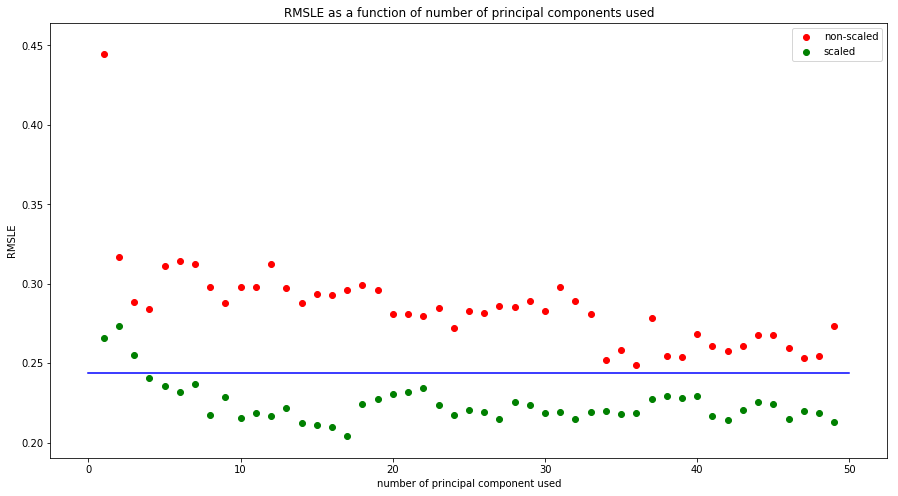

In [10]:
q = 50 # number of components

#### 
# pca with and without scaling
####
pca = PCA()
pca.fit_transform(X)
X1 = pca.transform(X)
Xtest1 = pca.transform(Xtest)

pca.fit_transform(scale(X))
X2 = pca.transform(scale(X))
Xtest2 = pca.transform(scale(Xtest))
RMSLE = []
RMSLE_scale = []
for n in range(1,q):
    Xsub1 = X1[:,0:n]
    Xsubtest1 = Xtest1[:,0:n]
    clf2 = DecisionTreeRegressor()
    clf2.fit(Xsub1, y) 
    # save RMSLE
    RMSLE.append(np.sqrt(mean_squared_error(clf2.predict(Xsubtest1), ytest)))
    
    Xsub2 = X2[:,0:n]
    Xsubtest2 = Xtest2[:,0:n]
    clf2 = DecisionTreeRegressor()
    clf2.fit(Xsub2, y) 
    # save RMSLE
    RMSLE_scale.append(np.sqrt(mean_squared_error(clf2.predict(Xsubtest2), ytest)))
plt.subplots(1,1, figsize=(15, 8))
ns = plt.scatter(range(1,q), RMSLE, c='red')
s = plt.scatter(range(1,q), RMSLE_scale, c='green')
plt.title(u"RMSLE as a function of number of principal components used")
plt.xlabel(u'number of principal component used')
plt.ylabel('RMSLE')
plt.plot([0, q], [RMSLE_DT, RMSLE_DT],'b-')
plt.legend((ns,s),('non-scaled', 'scaled'))

As we can see, components from 1 to 40 have a high RMSLE so we can try to use 50 components from the 41st one.

Unfortunately, I tried to modify my above code to take the 41 to 90 components and apply PCA on it but couldn't make it.